# Data Science Job **Salaries**

Overview

Data science is one of the fastest-growing and most in-demand fields today. Since 2012, the number of Data Scientist jobs has grown by more than 650%, and the demand continues to rise. The U.S. Bureau of Labor Statistics expects data science roles to grow nearly 28% more by 2026.

However, there aren’t enough skilled professionals to fill these jobs. Reports suggest a shortage of over 140,000 experts with strong analytical skills in the U.S., along with 1.5 million managers who need to understand data-driven decision-making.

As a result, Data Scientists earn high salaries—often over six figures—and have the flexibility to work in different cities or even countries. The field offers both job security and global opportunities for growth.

# **Imports**

In [1]:

import os, glob, warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Load & Upload CSV **File**

In [2]:

candidates = glob.glob("/mnt/data/*.csv") + glob.glob("/content/*.csv") + glob.glob("/content/drive/MyDrive/*.csv")
file = None
for f in candidates:
    name = os.path.basename(f).lower()
    if 'salary' in name or 'data' in name or 'ds' in name:
        file = f; break
if file is None and candidates:
    file = candidates[0]
if file is None:
    from google.colab import files
    print("No CSV in /mnt/data or /content. Please upload file now.")
    up = files.upload()
    file = list(up.keys())[0]
print("Loading:", file)
df = pd.read_csv(file)
print("Shape:", df.shape)
df.head()

No CSV in /mnt/data or /content. Please upload file now.


Saving data_ss.csv to data_ss.csv
Loading: data_ss.csv
Shape: (607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Cleaning & Preparing **Data**

In [3]:

df = df.copy()
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
if 'experience_level' in df.columns:
    df['experience_level'] = df['experience_level'].map({'SE':'Senior','MI':'Mid','EN':'Entry','EX':'Executive'}).fillna(df['experience_level'])
if 'employment_type' in df.columns:
    df['employment_type'] = df['employment_type'].map({'FT':'Full-time','PT':'Part-time','CT':'Contract','FL':'Freelance'}).fillna(df['employment_type'])
if 'company_size' in df.columns:
    df['company_size'] = df['company_size'].map({'S':'Small','M':'Medium','L':'Large'}).fillna(df['company_size'])
if 'remote_ratio' in df.columns:
    df.rename(columns={'remote_ratio':'job_type'}, inplace=True)
if 'job_type' in df.columns and df['job_type'].dtype != object:
    df['job_type'] = df['job_type'].map({100:'remote',50:'hybrid',0:'onsite'}).fillna(df['job_type'])
df.drop_duplicates(inplace=True)
print("After clean shape:", df.shape)

After clean shape: (607, 12)


# Basic **Summary**

In [4]:
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nNumeric summary:")
display(df.select_dtypes(include=[np.number]).describe().T)

Columns: ['unnamed:_0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'job_type', 'company_location', 'company_size']

Missing values:
 unnamed:_0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
job_type              0
dtype: int64

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
unnamed:_0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0



# Helper for consistent **figsize**

In [5]:

def show_plot():
    plt.tight_layout()
    plt.show()



# Count Experience **Level**

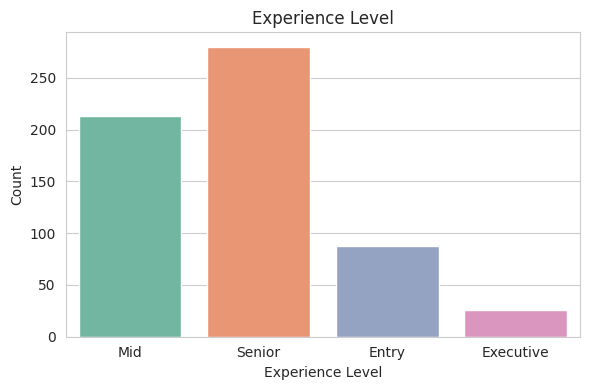

In [6]:

if 'experience_level' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='experience_level', data=df, palette='Set2')
    plt.title('Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Count')
    show_plot()
else:
    print("Column 'experience_level' not found in df.")

# Count Employment **Type**

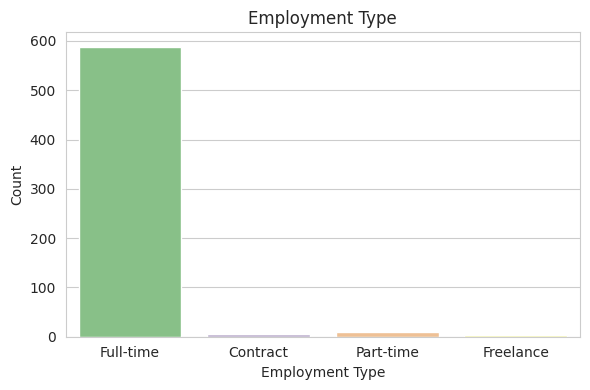

In [7]:
if 'employment_type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='employment_type', data=df, palette='Accent')
    plt.title('Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Count')
    show_plot()
else:
    print("Column 'employment_type' not found in df.")

# Salary by Experience **Level**

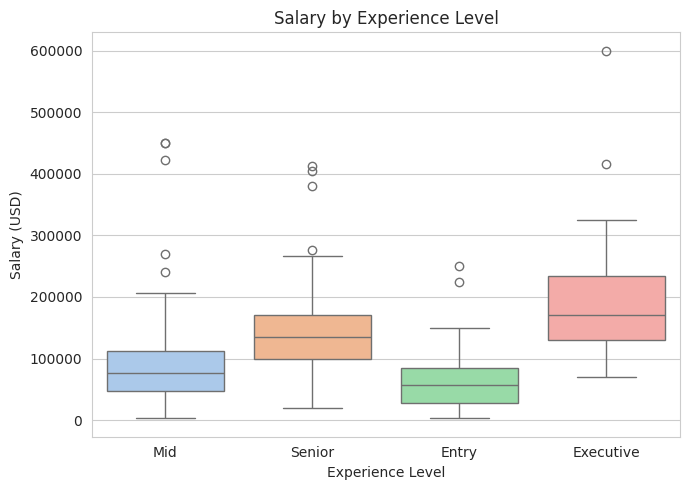

In [8]:
if 'salary_in_usd' in df.columns and 'experience_level' in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='pastel')
    plt.title('Salary by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Salary (USD)')
    show_plot()
else:
    print("Required columns not found: need 'salary_in_usd' and 'experience_level'.")

# Salary Distribution (**USD**

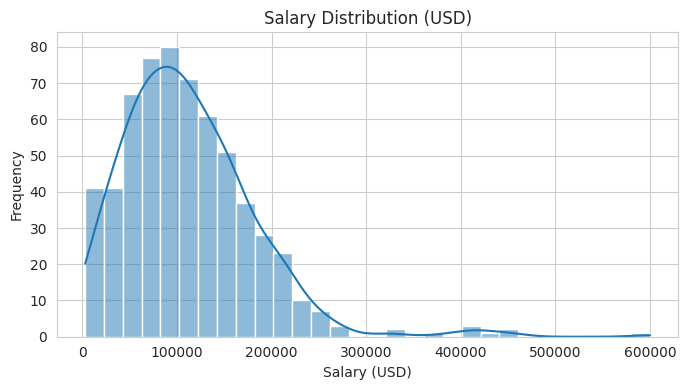

In [9]:

if 'salary_in_usd' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['salary_in_usd'].dropna(), bins=30, kde=True)
    plt.title('Salary Distribution (USD)')
    plt.xlabel('Salary (USD)')
    plt.ylabel('Frequency')
    show_plot()
else:
    print("Column 'salary_in_usd' not found in df.")

# Mean Salary by Company **Size**

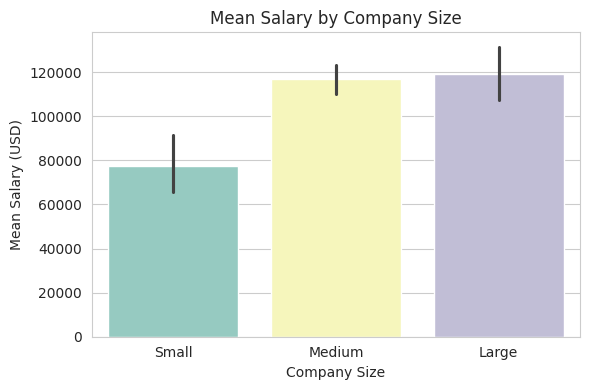

In [10]:

if 'company_size' in df.columns and 'salary_in_usd' in df.columns:
    plt.figure(figsize=(6,4))
    order = ['Small','Medium','Large'] if set(['Small','Medium','Large']).issubset(set(df['company_size'].dropna().unique())) else None
    sns.barplot(x='company_size', y='salary_in_usd', data=df, estimator='mean', order=order, palette='Set3')
    plt.title('Mean Salary by Company Size')
    plt.xlabel('Company Size')
    plt.ylabel('Mean Salary (USD)')
    show_plot()
else:
    print("Required columns not found: need 'company_size' and 'salary_in_usd'.")


# **Salary by Job Type**


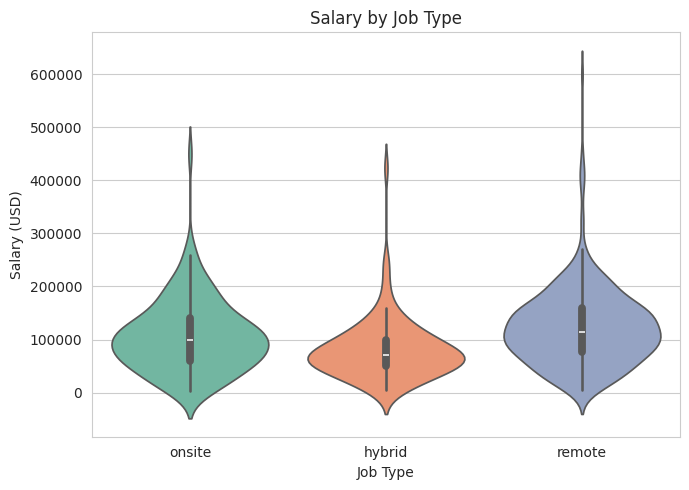

In [11]:

if 'job_type' in df.columns and 'salary_in_usd' in df.columns:
    plt.figure(figsize=(7,5))
    sns.violinplot(x='job_type', y='salary_in_usd', data=df, palette='Set2')
    plt.title('Salary by Job Type')
    plt.xlabel('Job Type')
    plt.ylabel('Salary (USD)')
    show_plot()
else:
    print("Required columns not found: need 'job_type' and 'salary_in_usd'.")


# **Top 10 job titles by count**

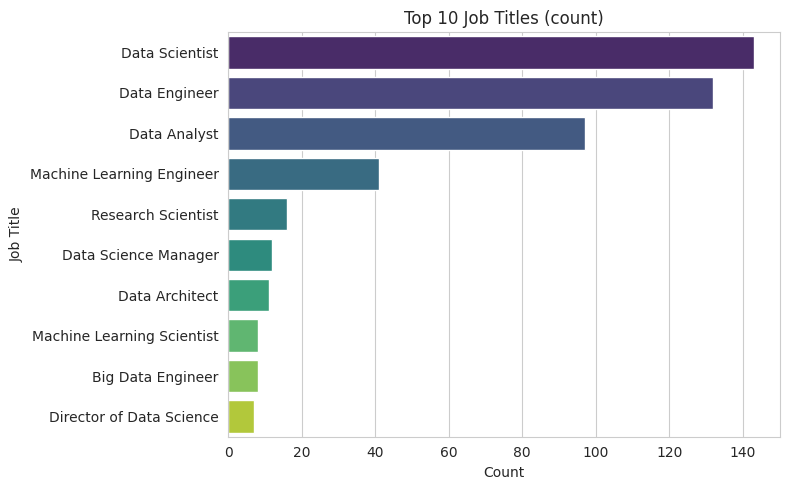

In [12]:

if 'job_title' in df.columns:
    top = df['job_title'].value_counts().nlargest(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top.values, y=top.index, palette='viridis')
    plt.title('Top 10 Job Titles (count)')
    plt.xlabel('Count')
    plt.ylabel('Job Title')
    show_plot()
else:
    print("Column 'job_title' not found in df.")


# **Top 10 job titles by mean salary**

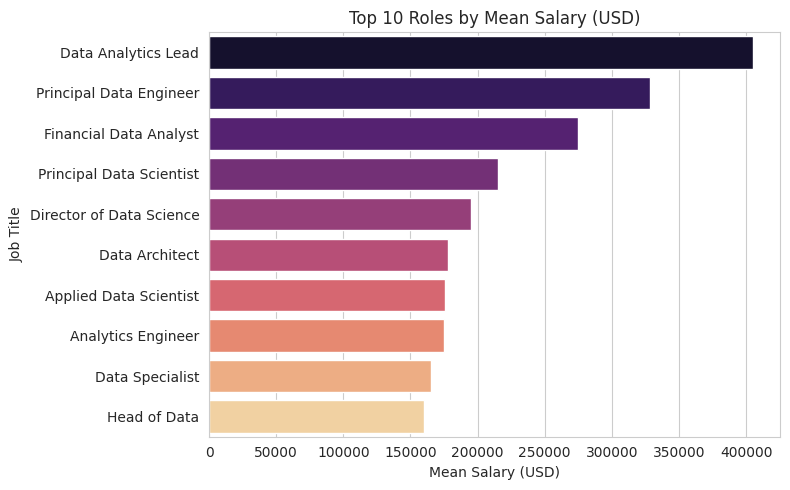

In [13]:

if 'job_title' in df.columns and 'salary_in_usd' in df.columns:
    top_mean = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_mean.values, y=top_mean.index, palette='magma')
    plt.title('Top 10 Roles by Mean Salary (USD)')
    plt.xlabel('Mean Salary (USD)')
    plt.ylabel('Job Title')
    show_plot()
else:
    print("Required columns not found: need 'job_title' and 'salary_in_usd'.")

# **Correlation Heatmap**

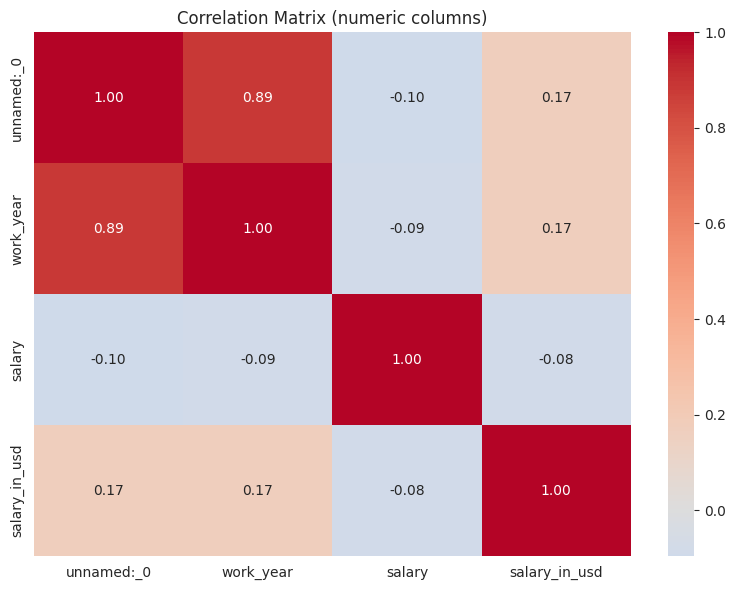

In [14]:
num = df.select_dtypes(include=[np.number])
if num.shape[1] > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix (numeric columns)')
    show_plot()
else:
    print("Not enough numeric columns for correlation heatmap. Numeric columns found:", num.columns.tolist())

# **Mean Salary by Experience Level**


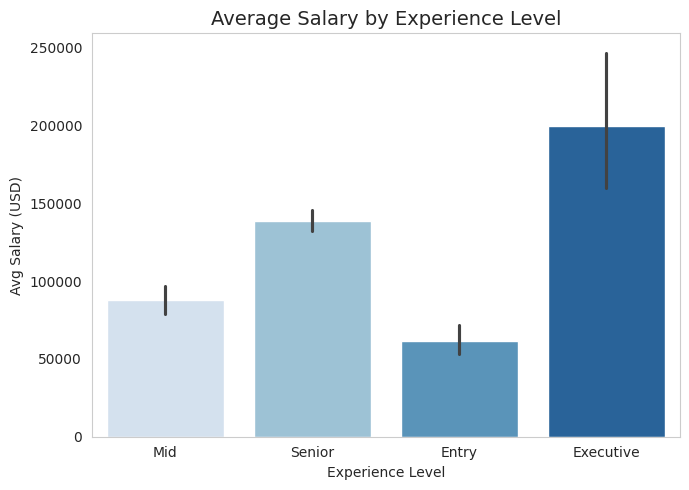

In [15]:
if 'experience_level' in df.columns and 'salary_in_usd' in df.columns:
    plt.figure(figsize=(7,5))
    sns.barplot(
        x='experience_level',
        y='salary_in_usd',
        data=df,
        estimator='mean',
        palette='Blues'
    )
    plt.title('Average Salary by Experience Level', fontsize=14)
    plt.xlabel('Experience Level')
    plt.ylabel('Avg Salary (USD)')
    plt.grid(axis='y')
    show_plot()
else:
    print("❌ Required columns: 'experience_level' and 'salary_in_usd'")

# **Salary Distribution by Experience Level**


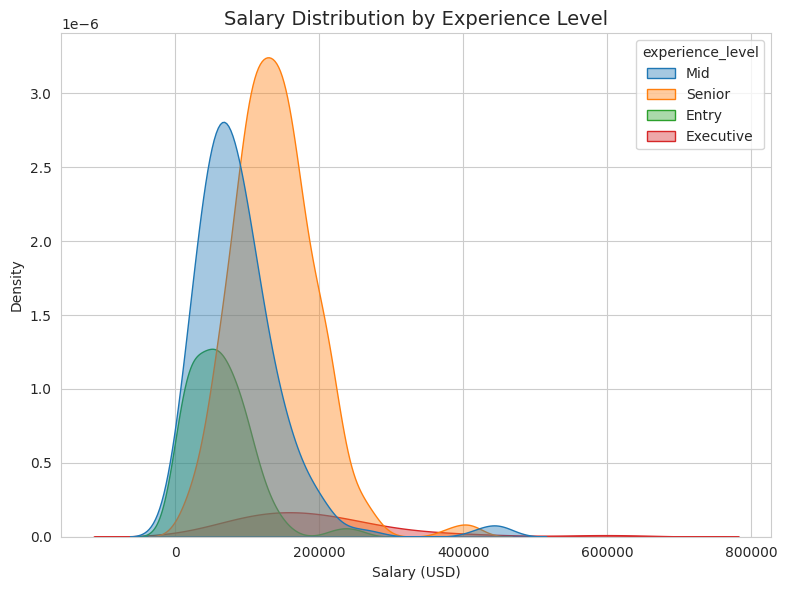

In [16]:

if 'experience_level' in df.columns and 'salary_in_usd' in df.columns:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x='salary_in_usd', hue='experience_level', fill=True, alpha=0.4)
    plt.title('Salary Distribution by Experience Level', fontsize=14)
    plt.xlabel('Salary (USD)')
    plt.ylabel('Density')
    plt.grid(True)
    show_plot()
else:
    print("❌ Columns 'experience_level' & 'salary_in_usd' required.")